In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer import VerticalPitch

In [2]:
#set general use colors
text_color = 'w'

In [3]:
data = pd.read_csv('shots.csv')

In [4]:
data = pd.DataFrame(data)

# Splitting the 'adjusted_timestamp' column into two new columns
data[['minutes', 'seconds']] = data['adjusted_timestamp'].str.split(':', expand=True)



In [5]:
data.drop(['adjusted_timestamp'], axis=1, inplace=True)
data

,player_name,possession_team_name,shot_outcome_name,period,x,y,minutes,seconds
0,Alexis Mac Allister,Argentina,Saved,1,92.4,30.0,04,40
1,Rodrigo Javier De Paul,Argentina,Blocked,1,99.2,47.9,07,36
2,Ángel Fabián Di María Hernández,Argentina,Off T,1,103.1,34.6,16,15
3,Lionel Andrés Messi Cuccittini,Argentina,Goal,1,108.0,40.0,22,24
4,Alexis Mac Allister,Argentina,Wayward,1,94.3,23.5,31,35
5,Ángel Fabián Di María Hernández,Argentina,Goal,1,111.8,32.1,35,22
6,Rodrigo Javier De Paul,Argentina,Saved,2,103.3,52.3,48,49
7,Julián Álvarez,Argentina,Saved,2,110.5,24.9,58,21
8,Lionel Andrés Messi Cuccittini,Argentina,Off T,2,109.7,46.0,59,51
9,Randal Kolo Muani,France,Off T,2,113.4,34.6,67,15


In [6]:
# argentina
Argentina = data[data['possession_team_name'] == 'Argentina']
Argentina

# Extract first name
Argentina['first_name'] = Argentina['player_name'].apply(lambda name: name.split()[0])

# Drop the original 'player_name' column
Argentina = Argentina.drop(columns=['player_name'])

Argentina


C:\Users\heyse\AppData\Local\Temp\ipykernel_6040\1406099650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Argentina['first_name'] = Argentina['player_name'].apply(lambda name: name.split()[0])


,possession_team_name,shot_outcome_name,period,x,y,minutes,seconds,first_name
0,Argentina,Saved,1,92.4,30.0,04,40,Alexis
1,Argentina,Blocked,1,99.2,47.9,07,36,Rodrigo
2,Argentina,Off T,1,103.1,34.6,16,15,Ángel
3,Argentina,Goal,1,108.0,40.0,22,24,Lionel
4,Argentina,Wayward,1,94.3,23.5,31,35,Alexis
5,Argentina,Goal,1,111.8,32.1,35,22,Ángel
6,Argentina,Saved,2,103.3,52.3,48,49,Rodrigo
7,Argentina,Saved,2,110.5,24.9,58,21,Julián
8,Argentina,Off T,2,109.7,46.0,59,51,Lionel
11,Argentina,Saved,2,98.9,32.2,71,31,Enzo


In [7]:
# France
France = data[data['possession_team_name'] == 'France']

# Extract first name
France['first_name'] = France['player_name'].apply(lambda name: name.split()[0])

# Drop the original 'player_name' column
France = France.drop(columns=['player_name'])

France


C:\Users\heyse\AppData\Local\Temp\ipykernel_6040\1333408596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France['first_name'] = France['player_name'].apply(lambda name: name.split()[0])


,possession_team_name,shot_outcome_name,period,x,y,minutes,seconds,first_name
9,France,Off T,2,113.4,34.6,67,15,Randal
10,France,Off T,2,102.5,27.9,70,09,Kylian
12,France,Goal,2,108.0,40.0,79,24,Kylian
13,France,Goal,2,104.8,30.1,80,59,Kylian
15,France,Blocked,2,95.9,32.2,92,57,Kylian
16,France,Saved,2,108.9,28.5,93,45,Adrien
19,France,Blocked,3,89.8,39.9,99,54,Youssouf
26,France,Blocked,4,101.4,26.6,115,38,Kylian
27,France,Goal,4,108.0,40.0,117,05,Kylian
28,France,Saved,4,103.7,45.1,122,44,Randal


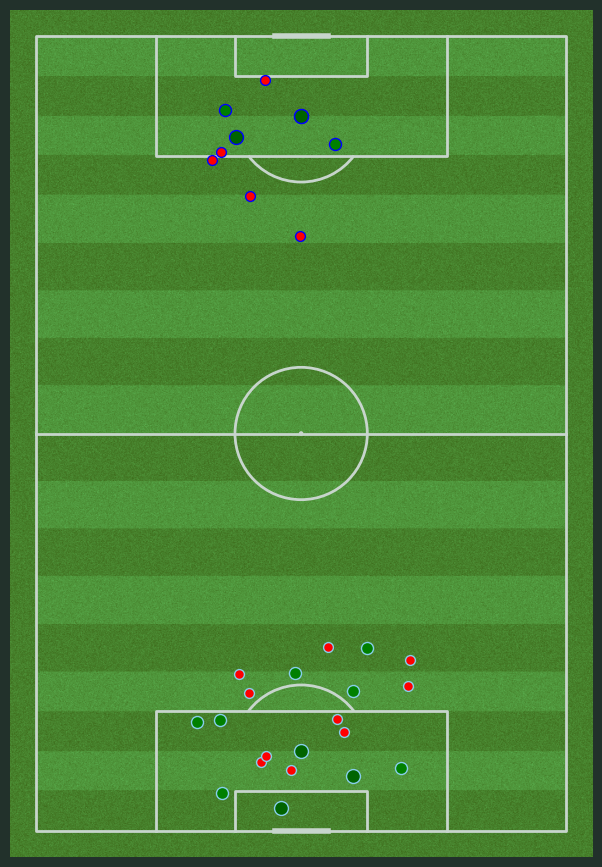

In [23]:
# Set up the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc', stripe=True)##22312b
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

plt.gca().invert_yaxis()

#plt.scatter(Argentina['y'],Argentina['x'],c='#ea6969',s=25)
# Define a function to plot and annotate shots
def plot_and_annotate_shots(df, team_color, edge_color, size, ax):
    for index, row in df.iterrows():
        # Adjusting coordinates for Argentina and France
        if team_color == 'green' or team_color == 'red':
            x, y = 80 - row['y'], row['x']
        else:
            x, y = row['y'], 120 - row['x']

        ax.scatter(x, y, c=team_color, edgecolors=edge_color, s=size)
        ax.annotate(row['first_name'], (x, y), color='white', fontsize=8, ha='center')


#plt.scatter(80-France['y'],120-France['x'],c='blue',s=25)
# Assuming Argentina and France are your DataFrames

# Filter Argentina shots
arg_goals = Argentina[Argentina['shot_outcome_name'] == 'Goal']
arg_on_target = Argentina[Argentina['shot_outcome_name'] == 'Saved']
arg_off_target = Argentina[Argentina['shot_outcome_name'] == 'Off T']
arg_blocked = Argentina[Argentina['shot_outcome_name'] == 'Blocked']
arg_Wayward = Argentina[Argentina['shot_outcome_name'] == 'Wayward']

# Filter France shots
fra_goals = France[France['shot_outcome_name'] == 'Goal']
fra_on_target = France[France['shot_outcome_name'] == 'Saved']
fra_off_target = France[France['shot_outcome_name'] == 'Off T']
fra_blocked = France[France['shot_outcome_name'] == 'Blocked']
fra_Wayward = France[France['shot_outcome_name'] == 'Wayward']

# Plot Argentina shots
ax.scatter(80-arg_goals['y'], arg_goals['x'], c='darkgreen', edgecolors='skyblue', s=100)
ax.scatter(80-arg_on_target['y'], arg_on_target['x'], c='green', edgecolors='skyblue', s=75)
ax.scatter(80-arg_off_target['y'], arg_off_target['x'], c='red', edgecolors='skyblue', s=50)
ax.scatter(80-arg_blocked['y'], arg_blocked['x'], c='red', edgecolors='skyblue', s=50)
ax.scatter(80-arg_Wayward['y'], arg_Wayward['x'], c='red', edgecolors='skyblue', s=50)

# Plot France shots (adjusting coordinates as needed)
ax.scatter(fra_goals['y'], 120 - fra_goals['x'], c='darkgreen', edgecolors='blue', s=100)
ax.scatter(fra_on_target['y'], 120 - fra_on_target['x'], c='green', edgecolors='blue', s=75)
ax.scatter(fra_off_target['y'], 120 - fra_off_target['x'], c='red', edgecolors='blue', s=50)
ax.scatter(fra_blocked['y'], 120 - fra_blocked['x'], c='red', edgecolors='blue',s=50)
ax.scatter(fra_Wayward['y'], 120 - fra_Wayward['x'], c='red', edgecolors='blue', s=50)


# Define a function to plot and annotate shots
def plot_and_annotate_shots(df, team_color, edge_color, size, ax):
    for index, row in df.iterrows():
        ax.scatter(row['y'], row['x'], c=team_color, edgecolors=edge_color, s=size)
        ax.annotate(row['first_name'], (row['y'], row['x']), color='white', fontsize=8, ha='center')


plt.show()

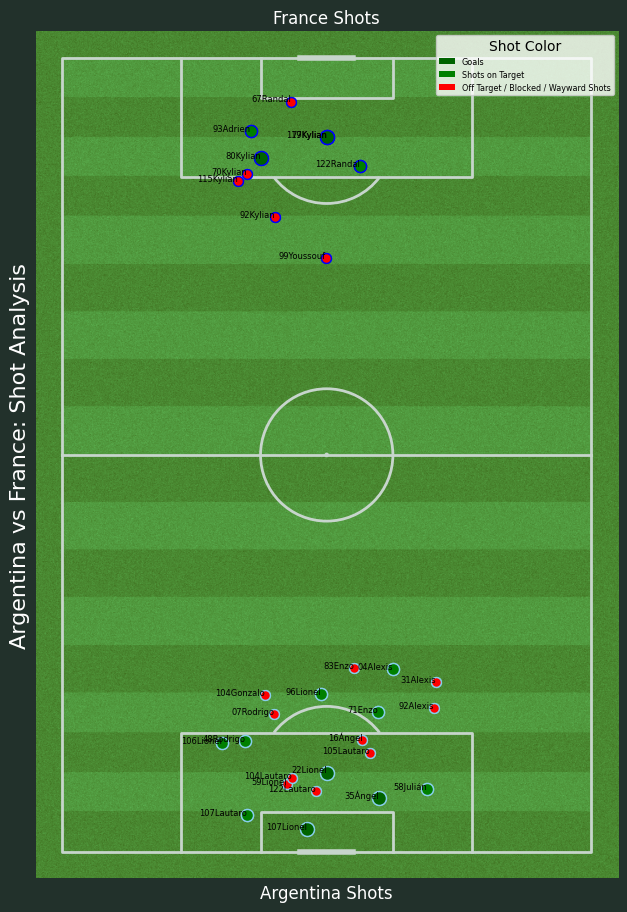

In [41]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc', stripe=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

plt.gca().invert_yaxis()

# Define a function to plot and annotate shots
def plot_and_annotate_shots(df, team_color, edge_color, size, ax):
    for index, row in df.iterrows():
        # Adjusting coordinates for Argentina and France
        if edge_color == 'skyblue':
            x, y = 80 - row['y'], row['x']
        else:
            x, y = row['y'], 120 - row['x']

        ax.scatter(x, y, c=team_color, edgecolors=edge_color, s=size)

        # Concatenating first name and minute for annotation
        annotation_text = f"{row['minutes']}{row['first_name']}"
        ax.annotate(annotation_text, (x, y), color='black', fontsize=6, ha='right')

#plt.scatter(Argentina['y'],Argentina['x'],c='#ea6969',s=25)


#plt.scatter(80-France['y'],120-France['x'],c='blue',s=25)
# Assuming Argentina and France are your DataFrames

plot_and_annotate_shots(arg_goals, 'darkgreen', 'skyblue', 100, ax)
plot_and_annotate_shots(arg_on_target, 'green', 'skyblue', 75, ax)
plot_and_annotate_shots(arg_off_target, 'red', 'skyblue', 50, ax)
plot_and_annotate_shots(arg_blocked, 'red', 'skyblue', 50, ax)
plot_and_annotate_shots(arg_Wayward, 'red', 'skyblue', 50, ax)

# Plot and annotate France shots
plot_and_annotate_shots(fra_goals, 'darkgreen', 'blue', 100, ax)
plot_and_annotate_shots(fra_on_target, 'green', 'blue', 75, ax)
plot_and_annotate_shots(fra_off_target, 'red', 'blue', 50, ax)
plot_and_annotate_shots(fra_blocked, 'red', 'blue', 50, ax)
plot_and_annotate_shots(fra_Wayward, 'red', 'blue', 50, ax)


# Plot Argentina shots
ax.scatter(80-arg_goals['y'], arg_goals['x'], c='darkgreen', edgecolors='skyblue', s=100)
ax.scatter(80-arg_on_target['y'], arg_on_target['x'], c='green', edgecolors='skyblue', s=75)
ax.scatter(80-arg_off_target['y'], arg_off_target['x'], c='red', edgecolors='skyblue', s=50)
ax.scatter(80-arg_blocked['y'], arg_blocked['x'], c='red', edgecolors='skyblue', s=50)
ax.scatter(80-arg_Wayward['y'], arg_Wayward['x'], c='red', edgecolors='skyblue', s=50)

# Plot France shots (adjusting coordinates as needed)
ax.scatter(fra_goals['y'], 120 - fra_goals['x'], c='darkgreen', edgecolors='blue', s=100)
ax.scatter(fra_on_target['y'], 120 - fra_on_target['x'], c='green', edgecolors='blue', s=75)
ax.scatter(fra_off_target['y'], 120 - fra_off_target['x'], c='red', edgecolors='blue', s=50)
ax.scatter(fra_blocked['y'], 120 - fra_blocked['x'], c='red', edgecolors='blue',s=50)
ax.scatter(fra_Wayward['y'], 120 - fra_Wayward['x'], c='red', edgecolors='blue', s=50)


# Update the title and axis labels
plt.xlabel('Argentina Shots', fontsize=12, color='white')  # Increase font size for X-axis label
plt.ylabel('Argentina vs France: Shot Analysis', fontsize=16, color='white')  # Increase font size for Y-axis label
plt.title('France Shots', fontsize=12, color='white')

# Create a custom legend with a smaller size and white background
legend_elements = [
    Patch(facecolor='darkgreen', edgecolor='none', label='Goals'),
    Patch(facecolor='green', edgecolor='none', label='Shots on Target'),
    Patch(facecolor='red', edgecolor='none', label='Off Target / Blocked / Wayward Shots')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='xx-small', facecolor='white', title='Shot Color')

# Display the plot
plt.show()